# Análise de Moran para estados

In [1]:
# Carregando os pacotes

import geopandas as gpd
import pandas as pd
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Pacotes PySAL
# libpysal: Biblioteca core do PySAL. Utilizamos o método de vizinhança Queen
from libpysal.weights.contiguity import Queen
# ESDA (Exploratory Spatial Data Analysis): utilizamos para o cálculo de correlação
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
# SPlot: Utilizamos para fazer os plots espaciais
from splot.esda import moran_scatterplot, plot_local_autocorrelation, lisa_cluster, plot_moran_bv

print("pacotes carregados")

pacotes carregados


In [3]:
# Lendo o ShapeFile do estado

MAPAS_PATH = "SHP_ESTADO/"

gdf = gpd.read_file(MAPAS_PATH + "BR_UF_2022.shp")

<Axes: >

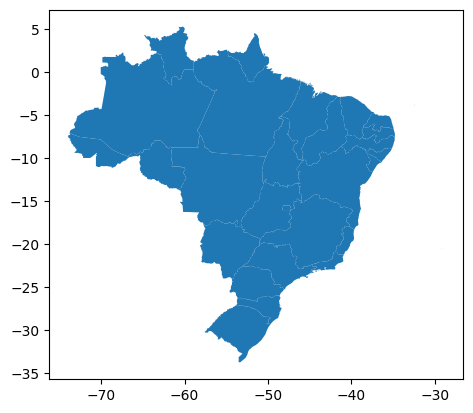

In [4]:
# Plotando o shapefile

gdf.plot()

In [6]:
# Analisando o shpe file

gdf

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ..."
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484..."
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.36640, -37.87109 -4.367..."
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ..."
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.79580 -7.17500, -34.79578 ..."


In [7]:
# Lendo o df estado

df_estado = pd.read_csv("df_estado.csv",sep = ',')

df_estado

,Unnamed: 0,SG_UF,BENF_ATIVO
0,0,RN,613082.0
1,1,ES,1285485.0
2,2,PB,468390.0
3,3,AL,390887.0
4,4,GO,1369809.0
5,5,MT,672044.0
6,6,PE,1415781.0
7,7,PI,405689.0
8,8,SP,18206824.0
9,9,DF,948619.0


In [8]:
# Realizando o Left Join com o shape

df_final_estado = pd.merge(
    gdf,
    df_estado,
    left_on= "SIGLA_UF",
    right_on= "SG_UF",
    how = "left"
)

In [9]:
df_final_estado

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,Unnamed: 0,SG_UF,BENF_ATIVO
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",27,AC,43975.0
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",17,AM,595765.0
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",11,PA,873360.0
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",14,AP,61938.0
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1...",18,TO,124991.0
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ...",25,MA,522634.0
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484...",7,PI,405689.0
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.36640, -37.87109 -4.367...",15,CE,1357255.0
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ...",0,RN,613082.0
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.79580 -7.17500, -34.79578 ...",2,PB,468390.0


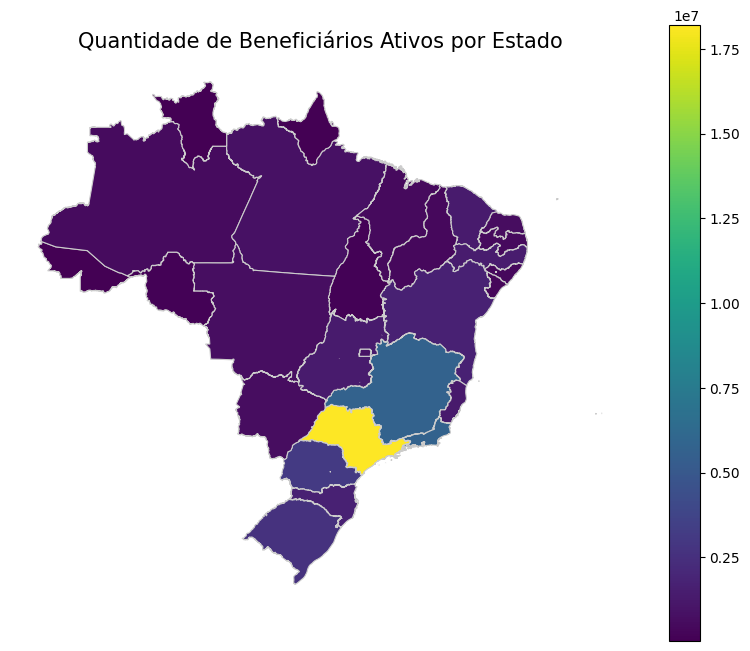

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_final_estado.plot(column='BENF_ATIVO', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adiciona título e remove eixos
ax.set_title('Quantidade de Beneficiários Ativos por Estado', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')

# Mostra o mapa
plt.show()

### Análise de correlação espacial

In [10]:
# Criando a matriz de pesos

weights = Queen.from_dataframe(df_final_estado)

C:\Users\carlo\AppData\Local\Temp\ipykernel_21392\1952329055.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = Queen.from_dataframe(df_final_estado)


In [11]:
#Normalizando a matriz por linhas
weights.transform = 'r'

In [12]:
y = df_final_estado["BENF_ATIVO"].copy()

In [13]:
moran = Moran(y,weights)

In [14]:
moran.I

0.26326407498921706

In [15]:
# Análise do p value

print(f"P-VALOR DE I = {moran.p_sim}")

P-VALOR DE I = 0.006


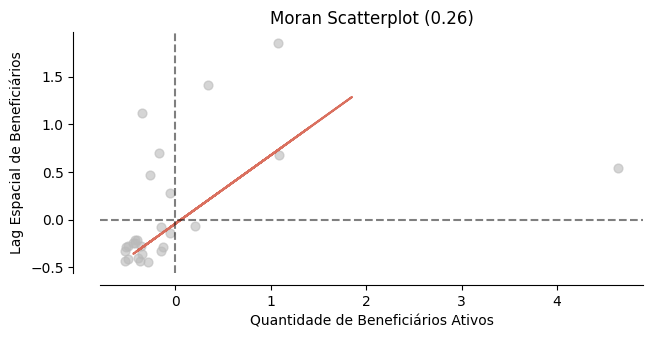

In [16]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
ax.set_xlabel('Quantidade de Beneficiários Ativos')
ax.set_ylabel('Lag Espacial de Beneficiários')
plt.show()

### Autocorrelação Espacial Local

In [17]:
moran_loc = Moran_Local(y,weights)

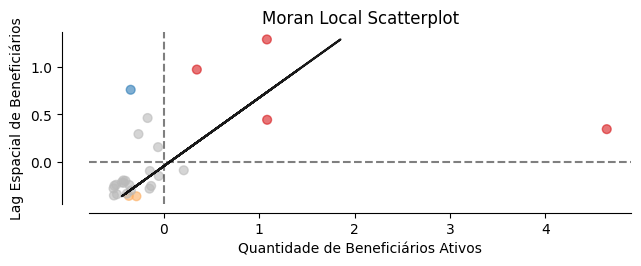

In [18]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Quantidade de Beneficiários Ativos')
ax.set_ylabel('Lag Espacial de Beneficiários')
plt.show()

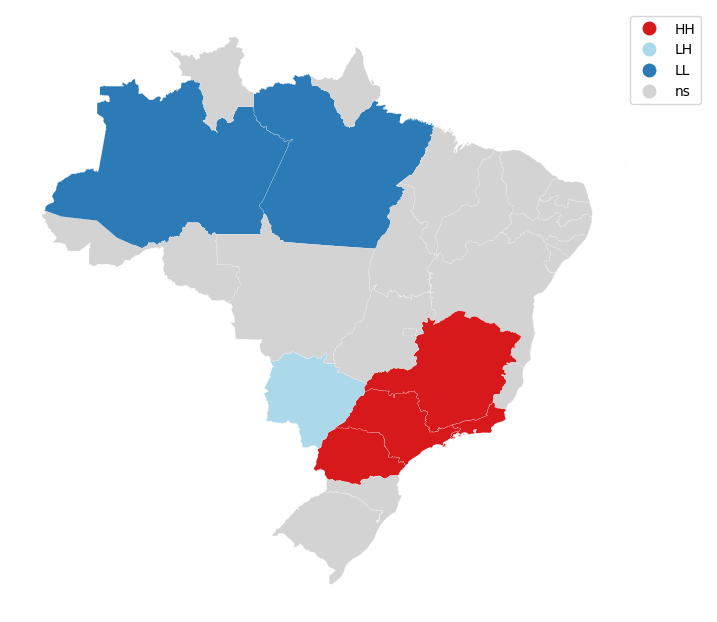

In [19]:
# Análise dos clusters
lisa_cluster(moran_loc,df_final_estado,p=0.05,figsize=(9,9))
plt.show()

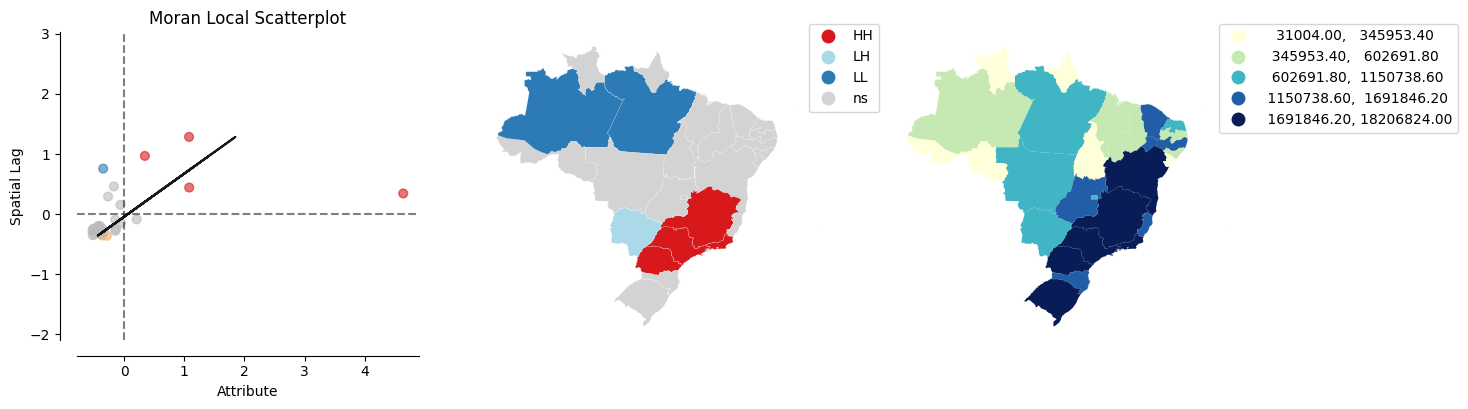

In [20]:
plot_local_autocorrelation(moran_loc,df_final_estado,'BENF_ATIVO')
plt.show()